   SIRwhiteN  SIRenvN  SIRdemN  SEIR
0       0.83     0.77     0.64  0.86
1       0.74     0.80     0.88  0.87
2       0.93     0.91     0.63  0.66
3       0.97     0.97     0.95  0.96


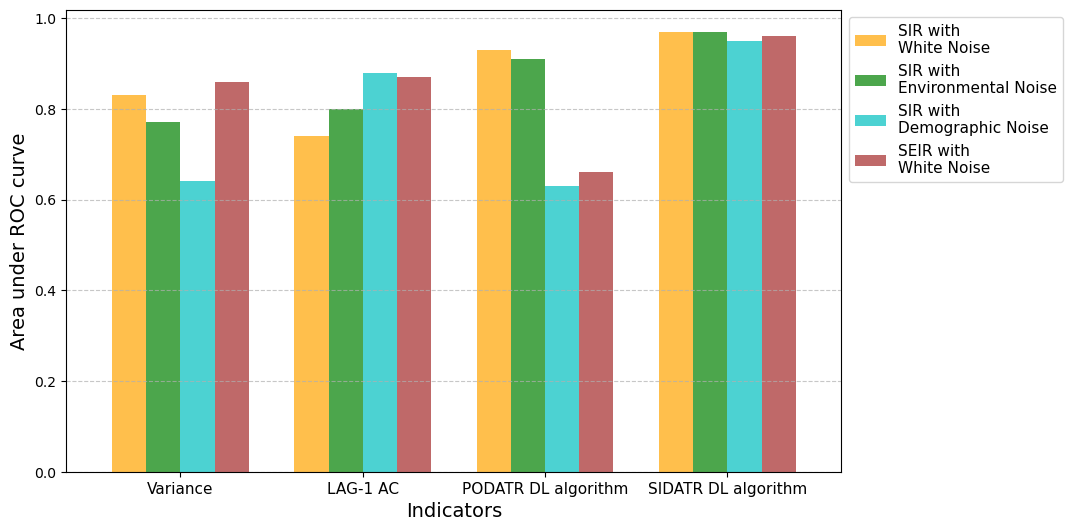

In [2]:
'''
Barplot of AUC of four different models
Shown in figure-4
Import AUC from ROC curve of different models and plot them in bar.
'''


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

combined_AUC_SIR = pd.DataFrame()
combined_AUC_Bury = pd.DataFrame()

test_models = ['SIRwhiteN', 'SIRenvN', 'SIRdemN', 'SEIR']

for test_model in test_models: 
    AUC_SIR = pd.read_csv(r'../data/roc/AUC_SIR_{}.csv'.format(test_model)) 
    combined_AUC_SIR = pd.concat([combined_AUC_SIR, AUC_SIR], axis=1)

for test_model in test_models: 
    AUC_Bury = pd.read_csv(r'../data/roc/AUC_Bury_{}.csv'.format(test_model)) 
    combined_AUC_Bury = pd.concat([combined_AUC_Bury, AUC_Bury], axis=1)

#taking only AUC by Bury model with the AUC df of SIR 
df = pd.concat([combined_AUC_SIR, combined_AUC_Bury.iloc[0].to_frame().T], axis=0, ignore_index=True)

# Switch the positions of the first and third rows
new_order = [1, 2, 3, 0]
data = df.iloc[new_order]

# Reset the index if needed
data.reset_index(drop=True, inplace=True)

print(data)



categories = ['Variance', 'LAG-1 AC', 'PODATR DL algorithm', 'SIDATR DL algorithm']
columns = ['SIR with \nWhite Noise', 'SIR with \nEnvironmental Noise', 'SIR with \nDemographic Noise', 'SEIR with \nWhite Noise']
index = np.arange(len(categories))
bar_width = 0.2

ax = data.plot(kind='bar', color=['orange', 'g', 'c', 'brown'], alpha=0.7, width = 0.75, figsize=(10, 6), rot=0)


plt.xlabel('Indicators', fontsize=14)
plt.ylabel('Area under ROC curve', fontsize=14)
# plt.title('Combined Bar Plot')
plt.xticks(index, categories, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(columns, loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

if not os.path.exists('../data/figures'):
    os.makedirs('../data/figures')

plt.savefig(r'../data/figures/fig-3-AUC.png', bbox_inches = 'tight')

plt.show()
